In [45]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
# PandasTools ~ rdDepictor
from rdkit import DataStructs
import re

pattern = re.compile("<\?xml.*\?>")


def DrawMol(mol, molSize=(450,450), kekulize=True):
    # mc = Chem.MolFromSmiles(mol)
    mc = mol
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        Chem.rdDepictor.Compute2DCoords(mc)

    drawer = rdMolDraw2D.MolDraw2DSVG(*molSize)
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:', '')
    svg = re.sub(pattern, '', svg)
    return svg

In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.PandasTools import LoadSDF
from pkasolver.chem import create_conjugate
import numpy as np
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D

df = LoadSDF("/data/shared/projects/pkasolver-data/misc_filtered_experimental_training_molecules.sdf")
df.rename(columns = {'ROMol':'mol_incorrect'}, inplace = True)
df = df.astype({'marvin_atom': int})
df = df.astype({'pKa': float})
df = df.astype({'marvin_pKa': float})

correct_mols = []
incor_smiles = []
cor_smiles = []
for mol, atom, pka in zip(df.mol_incorrect,df.marvin_atom, df.pKa):
    mol.__sssAtoms = [int(atom)]
    new_mol = create_conjugate(mol, int(atom), float(pka))
    new_mol.__sssAtoms = [int(atom)]
    correct_mols.append(new_mol)
    incor_smiles.append(Chem.MolToSmiles(mol))
    cor_smiles.append(Chem.MolToSmiles(new_mol))
df['mol_correct'] = correct_mols
df['incorrect_smiles'] = incor_smiles
df['correct_smiles'] = cor_smiles
df_sel = df.iloc[[0, 1, 16, 98, 216, 529],:]

# for mol, atom in zip(df.mol_correct, df.marvin_atom):
for i in df_sel.index:
    drawer = rdMolDraw2D.MolDraw2DSVG(300,300)
    drawer.DrawMolecule(df_sel.mol_correct[i],highlightAtoms=[int(df_sel.marvin_atom[i])])
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')
    # SVG(svg)
    with open(f'{i}_correct.svg', 'w') as f:
        f.write(svg)
    
    drawer = rdMolDraw2D.MolDraw2DSVG(300,300)
    drawer.DrawMolecule(df_sel.mol_incorrect[i],highlightAtoms=[int(df_sel.marvin_atom[i])])
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')
    # SVG(svg)
    with open(f'{i}_incorrect.svg', 'w') as f:
        f.write(svg)

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,mol_incorrect,mol_correct,incorrect_smiles,correct_smiles
0,5.05,7.57,7,basic,['datawarrior'],1138,,,Brc1ccc(C2[NH2+]CCS2)cc1,Brc1ccc(C2NCCS2)cc1
1,6.38,7.88,10,basic,['datawarrior'],5473,,,Brc1ccc2[nH+]c3c(c(N4CCOCC4)c2c1)CCC3,Brc1ccc2nc3c(c(N4CCOCC4)c2c1)CCC3
16,9.97,10.08,5,basic,['datawarrior'],2920,,,C/N=c1/scc(C)n1C,C/[NH+]=c1/scc(C)n1C
98,7.17,6.92,8,basic,['datawarrior'],5813,,,CCCC(=O)C(CC[NH+]1CCOCC1)(c1ccccc1)c1ccccc1,CCCC(=O)C(CCN1CCOCC1)(c1ccccc1)c1ccccc1
216,3.92,4.81,8,basic,['datawarrior'],3094,,,COC(=O)[C@@H]1CSC[NH2+]1,COC(=O)[C@@H]1CSCN1
529,8.70,6.84,11,acidic,['chembl25'],2623130,,,O=c1[nH]c2ccccc2cc1[O-],O=c1[nH]c2ccccc2cc1O

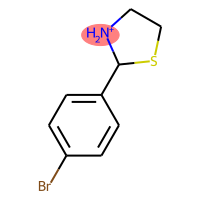
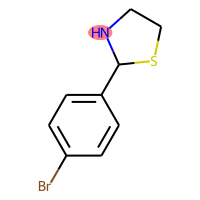
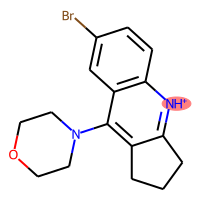
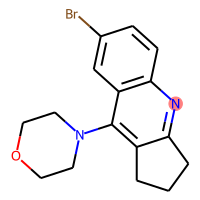
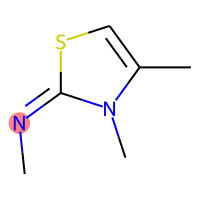
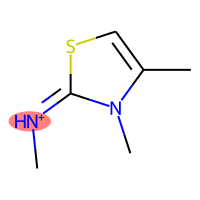
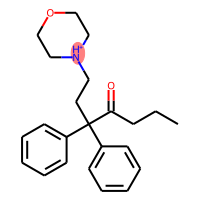
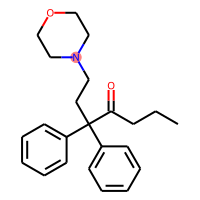
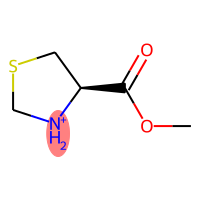
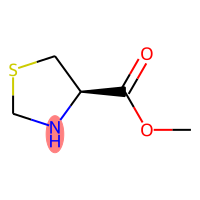
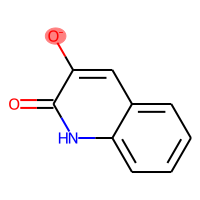
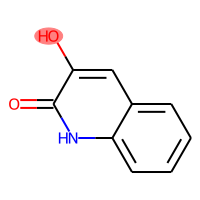

In [17]:

# print(df_sel.to_latex())
df_sel